# Time Analysis prediction 

using the regrssion techniques can you predict the future of the stock market based on the history of it ?

![Time analysis](https://magoosh.com/statistics/files/2018/05/time_series.png)

it would be great to predict one day in the future, one month and one year !

## Reading and Explore the dataset

In [115]:
# Importing required modules
import pandas as pd          
import numpy as np               # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
import datetime as dt
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 

import warnings                   # To ignore the warnings 
warnings.filterwarnings("ignore")


# Settings for pretty nice plots
plt.style.use('fivethirtyeight')
plt.show()

In [116]:
df = pd.read_csv("EURUSD_15m_BID_01.01.2010-31.12.2016.csv")
df.head()

,Time,Open,High,Low,Close,Volume
0,2010-01-01 00:00,1.43283,1.43293,1.43224,1.43293,608600007.1
1,2010-01-01 00:15,1.43285,1.43295,1.43229,1.43275,535600003.2
2,2010-01-01 00:30,1.43280,1.43303,1.43239,1.43281,436299999.2
3,2010-01-01 00:45,1.43285,1.43294,1.43229,1.43276,614299997.3
4,2010-01-01 01:00,1.43287,1.43292,1.43206,1.43282,705300008.8


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245444 entries, 0 to 245443
Data columns (total 6 columns):
Time      245444 non-null object
Open      245444 non-null float64
High      245444 non-null float64
Low       245444 non-null float64
Close     245444 non-null float64
Volume    245444 non-null float64
dtypes: float64(5), object(1)
memory usage: 11.2+ MB


In [118]:
# Convert string to datetime64
df['Time'] = df['Time'].apply(pd.to_datetime)
df.head()

,Time,Open,High,Low,Close,Volume
0,2010-01-01 00:00:00,1.43283,1.43293,1.43224,1.43293,608600007.1
1,2010-01-01 00:15:00,1.43285,1.43295,1.43229,1.43275,535600003.2
2,2010-01-01 00:30:00,1.43280,1.43303,1.43239,1.43281,436299999.2
3,2010-01-01 00:45:00,1.43285,1.43294,1.43229,1.43276,614299997.3
4,2010-01-01 01:00:00,1.43287,1.43292,1.43206,1.43282,705300008.8


## Adding Year Month Day and day of week Columns by extract them from Time

In [119]:
df['year'] = df.Time.dt.year
df['month'] = df.Time.dt.month
df['day'] = df.Time.dt.day
df['day of week'] = df.Time.dt.dayofweek

#Set Date column as the index column.
df.set_index('Time', inplace=True)
df.head(100)

,Open,High,Low,Close,Volume,year,month,day,day of week
Time,,,,,,,,,
2010-01-01 00:00:00,1.43283,1.43293,1.43224,1.43293,608600007.1,2010,1,1,4
2010-01-01 00:15:00,1.43285,1.43295,1.43229,1.43275,535600003.2,2010,1,1,4
2010-01-01 00:30:00,1.43280,1.43303,1.43239,1.43281,436299999.2,2010,1,1,4
2010-01-01 00:45:00,1.43285,1.43294,1.43229,1.43276,614299997.3,2010,1,1,4
2010-01-01 01:00:00,1.43287,1.43292,1.43206,1.43282,705300008.8,2010,1,1,4
...,...,...,...,...,...,...,...,...,...
2010-01-01 23:45:00,1.43335,1.43335,1.43335,1.43335,0.0,2010,1,1,4
2010-01-02 00:00:00,1.43335,1.43335,1.43335,1.43335,0.0,2010,1,2,5
2010-01-02 00:15:00,1.43335,1.43335,1.43335,1.43335,0.0,2010,1,2,5


In [120]:
df.shape

(245444, 9)

## Ploting some charts to have easy reading of this dataset

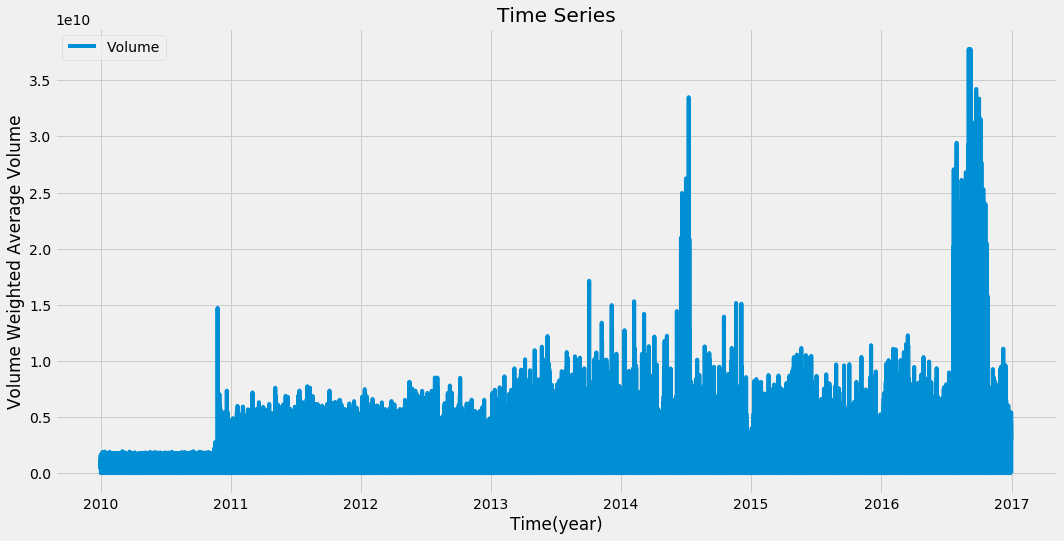

In [121]:
# Visualising the VWAP 

plt.figure(figsize=(16,8)) 
plt.plot(df['Volume'], label='Volume') 
plt.title('Time Series') 
plt.xlabel("Time(year)") 
plt.ylabel("Volume Weighted Average Volume") 
plt.legend(loc='best')

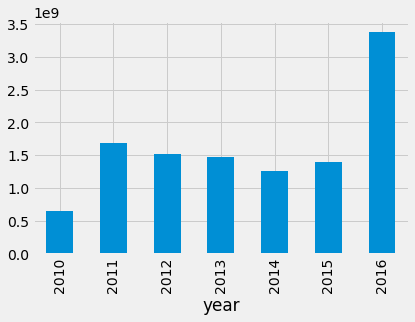

In [122]:
# Yearly Volume of Maruti Stocks
df.groupby('year')['Volume'].mean().plot.bar()

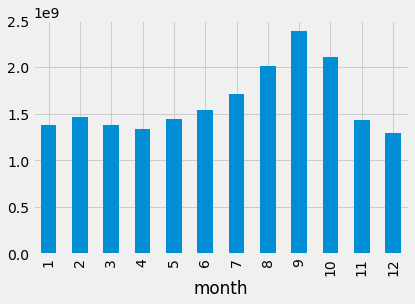

In [123]:
# Monthly VWAP of Maruti Stocks
df.groupby('month')['Volume'].mean().plot.bar()

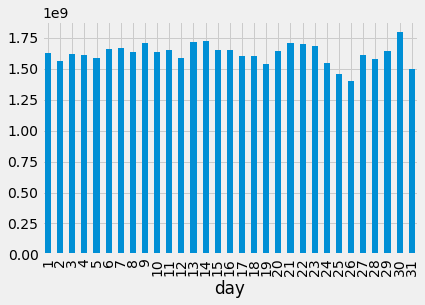

In [124]:
# Daily VWAP of Maruti Stocks

df.groupby('day')['Volume'].mean().plot.bar()

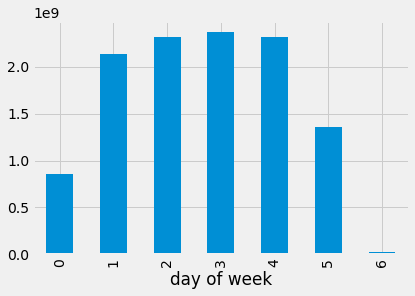

In [125]:
# Analysing w.r.t day of the week

df.groupby('day of week')['Volume'].mean().plot.bar()

## Split and Train data set to Predict the future

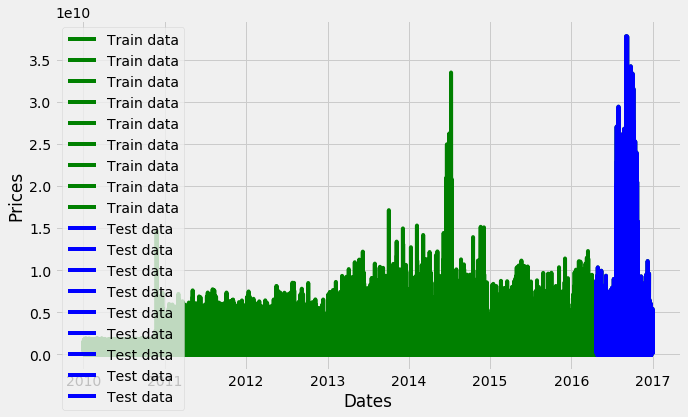

In [126]:
#split data into train and training set
train_data, test_data = df[3:int(len(df)*0.9)], df[int(len(df)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

### Reasempling using rule A in the command 

In [127]:
df.resample(rule = 'A').mean()[:5]

,Open,High,Low,Close,Volume,year,month,day,day of week
Time,,,,,,,,,
2010-12-31,1.326995,1.327535,1.326413,1.326996,6.583158e+08,2010.0,6.525631,15.718804,3.002398
2011-12-31,1.392384,1.392884,1.391888,1.392384,1.690308e+09,2011.0,6.525631,15.718918,3.005138
2012-12-31,1.285991,1.286324,1.285661,1.285992,1.515558e+09,2012.0,6.513264,15.755437,2.999658
2013-12-31,1.327970,1.328267,1.327676,1.327972,1.468350e+09,2013.0,6.525631,15.719260,2.994177
2014-12-31,1.328813,1.329035,1.328591,1.328808,1.261119e+09,2014.0,6.525631,15.719374,2.996917


Text(0.5, 1.0, 'Yearly Mean Volume')

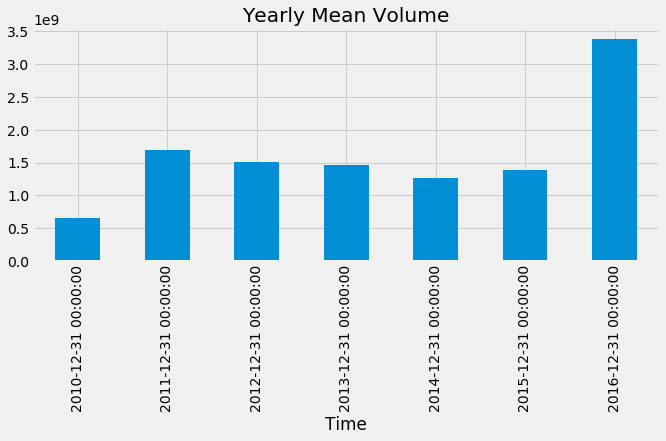

In [128]:
df['Volume'].resample('A').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly Mean Volume')

## PRedictions using ARMA

In [135]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

In [136]:
%matplotlib inline
from pylab import rcParams

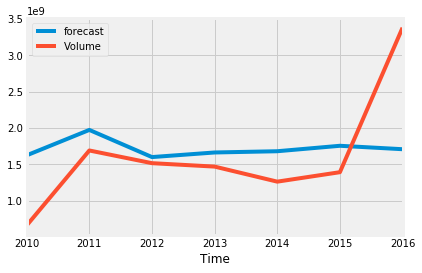

In [155]:
# Predicting humidity level of Montreal
humid = ARMA(df['Volume'].resample('A').mean(), order=(1,0))
res = humid.fit()
res.plot_predict()
plt.show()

## Prediction using ARIMA model

                             ARIMA Model Results                              
Dep. Variable:               D.Volume   No. Observations:                    6
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -131.250
Method:                       css-mle   S.D. of innovations      731180167.921
Date:                Sat, 22 Feb 2020   AIC                            270.500
Time:                        23:15:08   BIC                            269.667
Sample:                    12-31-2011   HQIC                           267.166
                         - 12-31-2016                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.537e+08   4.48e+08      1.012      0.386   -4.25e+08    1.33e+09
ar.L1.D.Volume     0.2832      1.077      0.263      0.810      -1.827       2.393
ar.L2.D.Volume    -0.4757      0.527

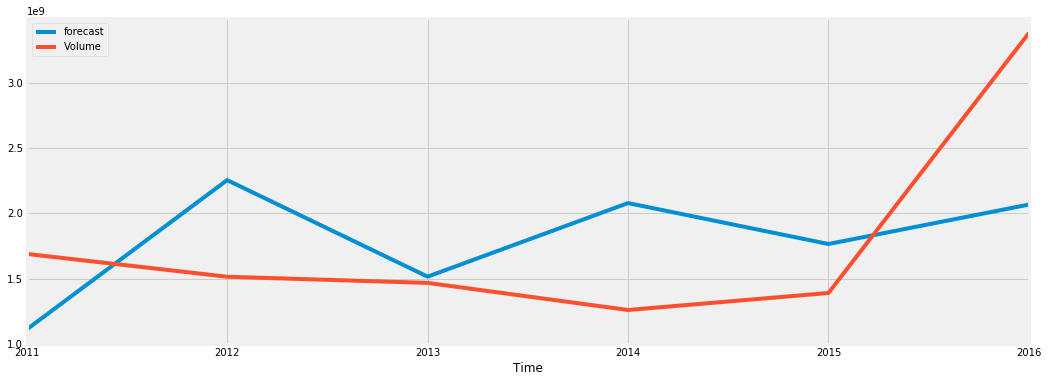

In [138]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(df['Volume'].resample('A').mean(), order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict()
plt.show()

## Creating Shiting Column For Volum For month prediction 'on 30 days'

In [161]:
volum = len(df['2010-01-01'])*30
df['shift_volum'] = df['Volume'].shift(-volum)

In [162]:
df

,Open,High,Low,Close,Volume,year,month,day,day of week,shift_volum
Time,,,,,,,,,,
2010-01-01 00:00:00,1.43283,1.43293,1.43224,1.43293,608600007.1,2010,1,1,4,0.0
2010-01-01 00:15:00,1.43285,1.43295,1.43229,1.43275,535600003.2,2010,1,1,4,0.0
2010-01-01 00:30:00,1.43280,1.43303,1.43239,1.43281,436299999.2,2010,1,1,4,0.0
2010-01-01 00:45:00,1.43285,1.43294,1.43229,1.43276,614299997.3,2010,1,1,4,0.0
2010-01-01 01:00:00,1.43287,1.43292,1.43206,1.43282,705300008.8,2010,1,1,4,0.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31 22:45:00,1.05150,1.05150,1.05150,1.05150,0.0,2016,12,31,5,NaN
2016-12-31 23:00:00,1.05150,1.05150,1.05150,1.05150,0.0,2016,12,31,5,NaN
2016-12-31 23:15:00,1.05150,1.05150,1.05150,1.05150,0.0,2016,12,31,5,NaN


In [164]:
x=np.array(df.iloc[:,:-1])
y=np.array(df['shift_volum'])
true_sample = np.array(df['Volume'])[-volum:]
test_Sample = x[-volum:]
test_Sample

array([[ 1.06621,  1.06696,  1.06607, ..., 12.     ,  2.     ,  4.     ],
       [ 1.06643,  1.06664,  1.06613, ..., 12.     ,  2.     ,  4.     ],
       [ 1.06641,  1.06657,  1.06613, ..., 12.     ,  2.     ,  4.     ],
       ...,
       [ 1.0515 ,  1.0515 ,  1.0515 , ..., 12.     , 31.     ,  5.     ],
       [ 1.0515 ,  1.0515 ,  1.0515 , ..., 12.     , 31.     ,  5.     ],
       [ 1.0515 ,  1.0515 ,  1.0515 , ..., 12.     , 31.     ,  5.     ]])

### Remove nans from x and those nan values are the shifted values and those will be predicted

In [132]:
x = x[:-volum]
y = y[:-volum]

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [134]:
from sklearn.linear_model import LinearRegression
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.12999064272297656


In [145]:
sample_test_prediction = clf.predict(test_Sample)
print("sample_test_prediction: ", sample_test_prediction)

sample_test_prediction:  [2.39808547e+09 2.36972656e+09 2.49576631e+09 ... 2.10303361e+09
 1.98618665e+09 2.19249914e+09]


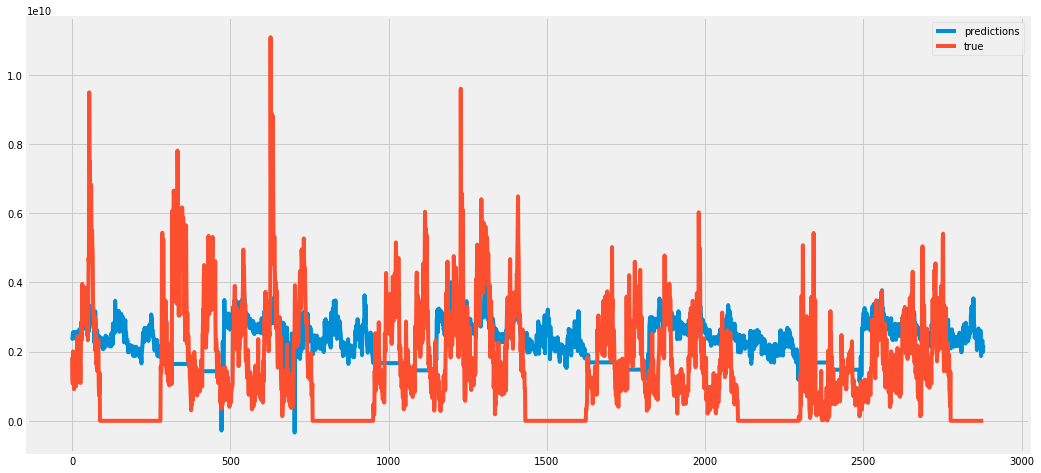

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8)) 
plt.plot(sample_test_prediction, label='predictions');
plt.plot(true_sample, label='true');
plt.legend()
plt.show();